### Add scripts path to the notebook's path

In [1]:
import os, sys

current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

scripts_path = os.path.join(parent_dir, 'src')

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# Insert the path to the Scripts directory
sys.path.insert(0, scripts_path)

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

d:\Assignments\Year_5\Deep Learning\Assignment - 1\notebooks


### Import Statements

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from src.mlp import MultiLayerPerceptron
from src.perceptron import Perceptron

### Step 1: Generate Dataset
We will generate a non-linearly separable dataset using `make_moons`.

In [3]:
# Generate dataset
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

# One-hot encode the labels
ohe = OneHotEncoder()
y_encoded = ohe.fit_transform(y.reshape(-1, 1)).toarray()

In [4]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

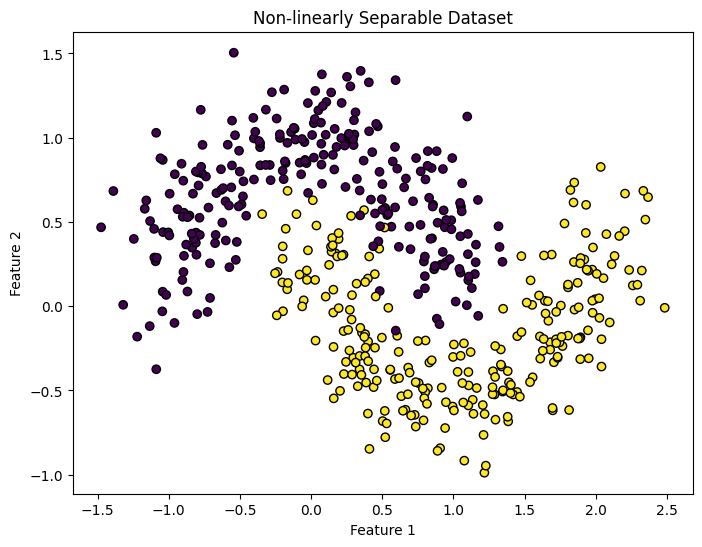

In [5]:
# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Non-linearly Separable Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Step 2: Initialize the MLP and Perceptron
Create instances of the `MultiLayerPerceptron` and `Perceptron` classes.

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Initialize MLP
mlp = MultiLayerPerceptron(
    num_inputs=2, 
    num_hidden=1, 
    hidden_width=8, 
    activation_function=sigmoid, 
    activation_derivated=sigmoid_derivative, 
    output_activation=softmax, 
    num_output=2,
    learning_rate=0.1
)

In [7]:
perceptron = Perceptron(n_iter=100, seed=42)

### Step 3: Train the MLP and Perceptron
Train the MLP and Perceptron on the training dataset and track the loss.

In [8]:
# Train the MLP
num_epochs = 1000
losses = []
for epoch in range(num_epochs):
    weight_gradients, bias_gradients, error = mlp.calculate_gradients(X_train, y_train)
    mlp.update_weights(weight_gradients)
    mlp.update_biases(bias_gradients)
    losses.append(error)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {error}")

Epoch 0, Loss: 0.5132159344465438
Epoch 100, Loss: 0.638457188939528
Epoch 200, Loss: 1.087939772358084
Epoch 300, Loss: 2.365241963783606
Epoch 400, Loss: 3.101585962955618
Epoch 500, Loss: 3.8339107284880196
Epoch 600, Loss: 1.5933376346426946
Epoch 700, Loss: 1.4471665166046535
Epoch 800, Loss: 2.8228464866538285
Epoch 900, Loss: 3.697891649726813


In [9]:
perceptron.fit(X=X_train, y=np.argmax(y_train, axis=1))

### Step 4: Evaluate and Visualize Decision Boundary
Test the model on the test set and visualize the decision boundary.

In [10]:
# Predict on the test set
def predict_classes(predictions):
    return np.argmax(predictions, axis=1)

y_pred = predict_classes(mlp.predict(X_test)[0])
y_true = predict_classes(y_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_true)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 91.00%


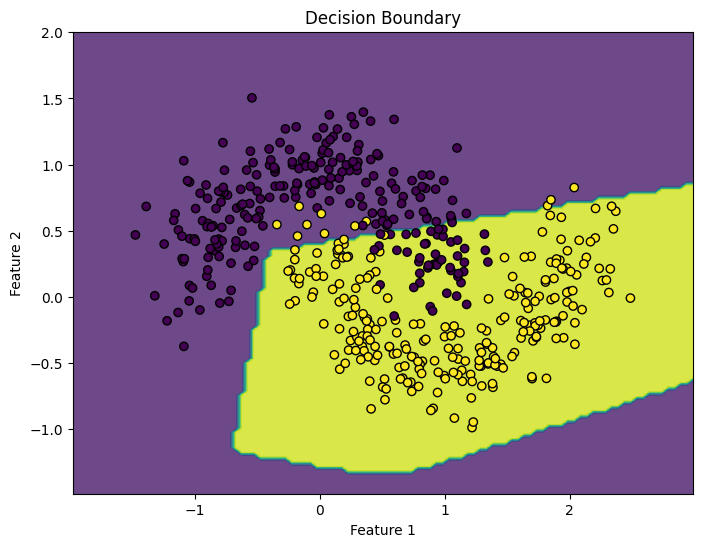

In [11]:
# Visualize decision boundary
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)
)
grid = np.c_[xx.ravel(), yy.ravel()]
probs = mlp.predict(grid)[0]
z = predict_classes(probs).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, z, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis')
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [12]:
y_pred = perceptron.heaviside(X=X_test)
# Calculate accuracy
accuracy = np.mean(y_pred == y_true)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 86.00%


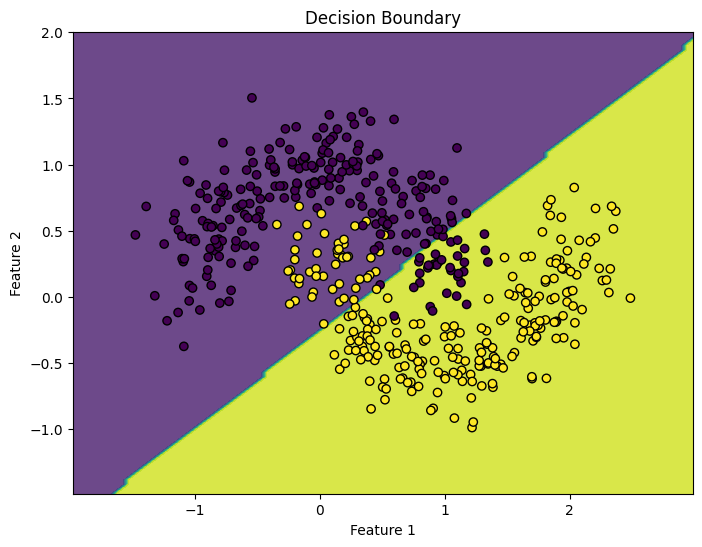

In [ ]:
# Define the min and max bounds of the plot
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# Create a grid of points
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100)
)

# Flatten the grid and predict for each point
grid = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron.heaviside(grid)
Z = Z.reshape(xx.shape)

# Plot the decision boundary with 'viridis' colormap
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')

# Scatter plot of the training data
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis')
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()